In [1]:
# Run the below code in the terminal to install the SOMPY package
# git clone https://github.com/hhl60492/SOMPY_robust_clustering.git
# cd path/to/the/cloned/folder/
# python setup.py install

In [16]:
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import joblib
sys.path.append('/Users/vishwajit/Desktop/SOMPY_robust_clustering-master/') #path/to/the/cloned/folder/
import sompy
from sompy.sompy import SOMFactory
from sompy.visualization import mapview
from sompy.visualization.umatrix import UMatrixView
from sompy.visualization.hitmap import HitMapView
from tqdm import tqdm

In [65]:
df = pd.read_csv('Cleaned_percent_data.csv',index_col='zip code tabulation area')

In [66]:
df.shape

(33120, 238)

In [67]:
sm = SOMFactory().build(df.values, normalization = 'var', initialization='pca',mapsize=[27,34])
sm.train(n_job=1, verbose='info',train_rough_len=50,train_finetune_len=100)
# No need to initialize number of nodes as it is calculated based on the eigenvalues of the matrix

 Training...
 pca_linear_initialization took: 0.443000 seconds
 Rough training...
 radius_ini: 5.000000 , radius_final: 1.250000, trainlen: 50

 epoch: 1 ---> elapsed time:  0.914000, quantization error: 11.422414

 epoch: 2 ---> elapsed time:  0.908000, quantization error: 11.322187

 epoch: 3 ---> elapsed time:  1.148000, quantization error: 11.069335

 epoch: 4 ---> elapsed time:  1.050000, quantization error: 10.996749

 epoch: 5 ---> elapsed time:  0.938000, quantization error: 10.966275

 epoch: 6 ---> elapsed time:  1.044000, quantization error: 10.946259

 epoch: 7 ---> elapsed time:  1.147000, quantization error: 10.927471

 epoch: 8 ---> elapsed time:  0.931000, quantization error: 10.909542

 epoch: 9 ---> elapsed time:  1.222000, quantization error: 10.892214

 epoch: 10 ---> elapsed time:  1.330000, quantization error: 10.874461

 epoch: 11 ---> elapsed time:  0.943000, quantization error: 10.856017

 epoch: 12 ---> elapsed time:  0.938000, quantization error: 10.836460

 

 epoch: 63 ---> elapsed time:  0.929000, quantization error: 9.427334

 epoch: 64 ---> elapsed time:  1.036000, quantization error: 9.425075

 epoch: 65 ---> elapsed time:  0.924000, quantization error: 9.422656

 epoch: 66 ---> elapsed time:  0.931000, quantization error: 9.420423

 epoch: 67 ---> elapsed time:  0.923000, quantization error: 9.418132

 epoch: 68 ---> elapsed time:  0.918000, quantization error: 9.415746

 epoch: 69 ---> elapsed time:  0.923000, quantization error: 9.413424

 epoch: 70 ---> elapsed time:  0.932000, quantization error: 9.411168

 epoch: 71 ---> elapsed time:  0.923000, quantization error: 9.408941

 epoch: 72 ---> elapsed time:  0.929000, quantization error: 9.406670

 epoch: 73 ---> elapsed time:  1.033000, quantization error: 9.404426

 epoch: 74 ---> elapsed time:  0.919000, quantization error: 9.402244

 epoch: 75 ---> elapsed time:  0.959000, quantization error: 9.400138

 epoch: 76 ---> elapsed time:  1.228000, quantization error: 9.398142

 epoch

In [73]:
sm1 = SOMFactory().build(df.values, normalization = 'var', initialization='pca',mapsize=[50,50])
sm1.train(n_job=1, verbose='info',train_rough_len=10,train_finetune_len=5)

 Training...
 pca_linear_initialization took: 0.453000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 10

 epoch: 1 ---> elapsed time:  2.566000, quantization error: 11.399375

 epoch: 2 ---> elapsed time:  2.555000, quantization error: 11.083943

 epoch: 3 ---> elapsed time:  2.764000, quantization error: 10.832078

 epoch: 4 ---> elapsed time:  2.755000, quantization error: 10.709278

 epoch: 5 ---> elapsed time:  3.525000, quantization error: 10.585207

 epoch: 6 ---> elapsed time:  3.645000, quantization error: 10.455215

 epoch: 7 ---> elapsed time:  3.868000, quantization error: 10.323011

 epoch: 8 ---> elapsed time:  3.536000, quantization error: 10.176348

 epoch: 9 ---> elapsed time:  2.701000, quantization error: 10.005011

 epoch: 10 ---> elapsed time:  2.656000, quantization error: 9.792216

 Finetune training...
 radius_ini: 1.750000 , radius_final: 1.000000, trainlen: 5

 epoch: 1 ---> elapsed time:  2.668000, quantization error: 9.5

In [74]:
sm1.calculate_topographic_error()

0.01817632850241546

In [68]:
sm.calculate_topographic_error()

0.11222826086956522

In [9]:
ms,mpd=sm._calculate_ms_and_mpd()
int(np.ceil(30*mpd))

1

In [25]:
sm.codebook.matrix.shape
# There are total of 918 nodes (34 horizontal and 27 vertical), each node has a weight of length 238.

(918, 239)

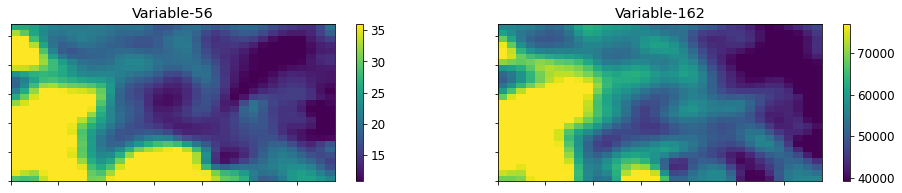

In [75]:
view2D  = mapview.View2D(10,10,"rand data",text_size=12)
view2D.show(sm, col_sz=2, which_dim=[55,161], desnormalize=True)
#which_dim takes a list of attributes/variables to be visualized using colormap.
#Variable-56 corresponds to percentage of population with Bachelor's degree or higher
#and Variable-162 to the median household income. As expected both the colormaps look similar. 

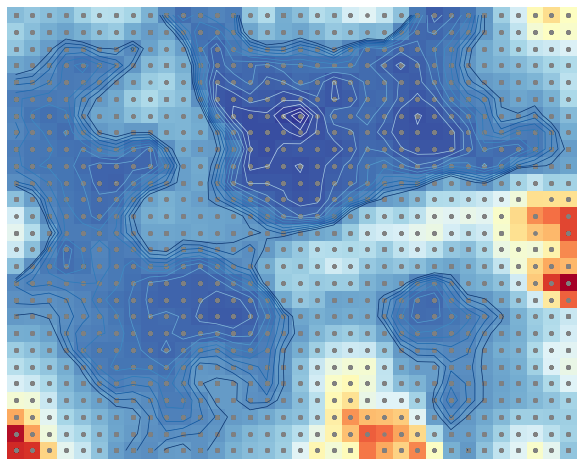

In [76]:
umat  = UMatrixView(width=10,height=10,title='U-matrix')
UMatrix = umat.show(sm)
#UMatrix contains distance between neighboring nodes. Red regions are the ones with large distances
#whereas blue with smaller distances between neighbors.
#

Performing K-means SSE elbow sweep...


/Users/vishwajit/Desktop/SOMPY_robust_clustering-master/sompy/visualization/hitmap.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


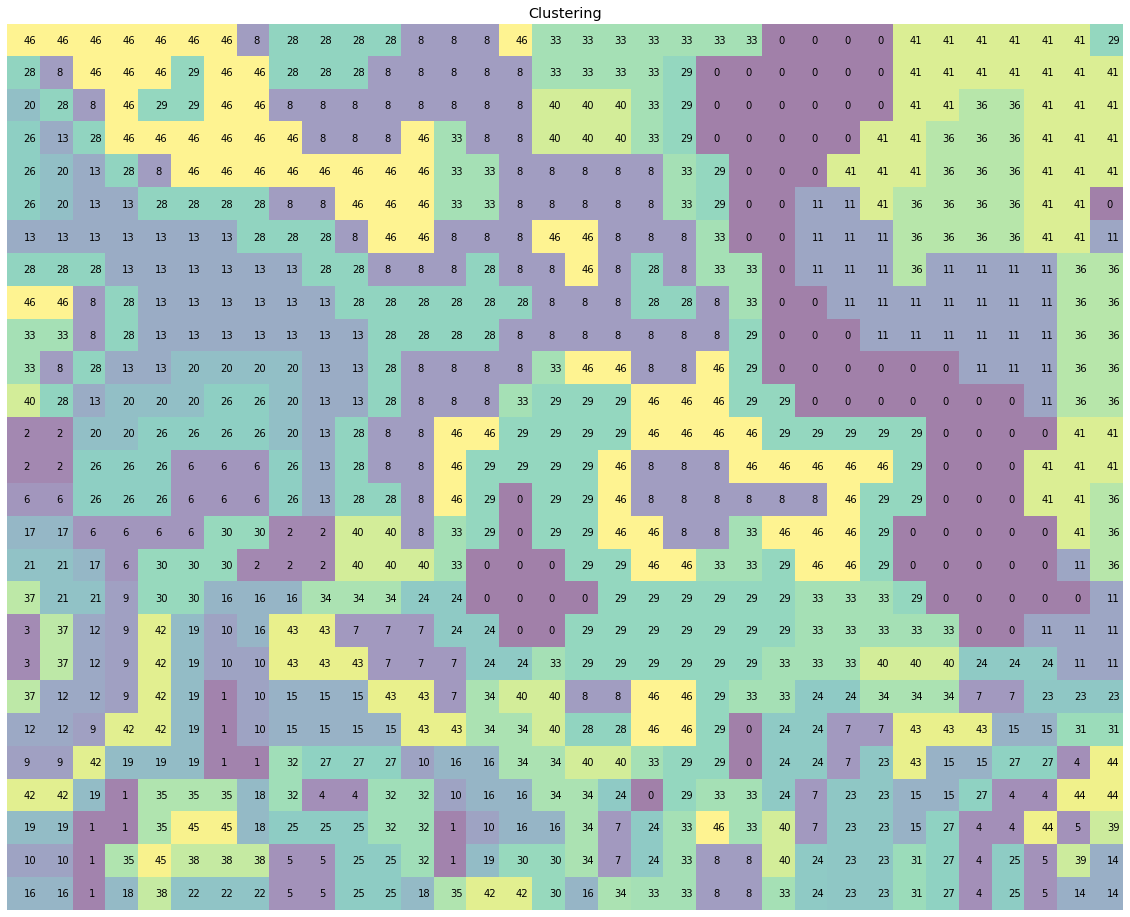

In [77]:
#sm.cluster uses 'elbow' method to find the optimal number of clusters. It calculates SSE for K ranging from 2 to 
#k_end (specified). One can also give directly the optimal number of clusters
K = 50 # stop at this k for SSE sweep
K_opt = 47
[labels, km, norm_data] = sm.cluster(opt=K_opt)
hits  = HitMapView(20,20,"Clustering",text_size=12)
a = hits.show(sm)

In [47]:
##Find the cluster label for each zipcode
x = sm.project_data(df.values)
cluster_labels = []
for i in tqdm(range(33120)):
    cluster_labels.append(labels[x[i]])

100%|██████████| 33120/33120 [00:00<00:00, 768494.37it/s]


In [18]:
'''norm_df = pd.DataFrame(columns=df.columns)
for col in tqdm(df.columns):
    norm_df[col] = (df[col]-df[col].mean())/df[col].std()
from scipy import spatial
tree = spatial.KDTree(sm.codebook.matrix)
def find_cluster(zipcode):
    node_index = tree.query(norm_df[norm_df.index==zipcode].values.reshape(238,))[1]
    cluster_label = labels[node_index]
    return cluster_label
cluster_labels = []
for zipcode in tqdm(df.index):
    cluster_labels.append(find_cluster(zipcode))'''

In [48]:
df['cluster_labels'] = cluster_labels

In [40]:
df = pd.read_csv('Clustered_data.csv',index_col='zip code tabulation area')

In [49]:
import seaborn as sns

In [50]:
cluster_dict = df['cluster_labels'].value_counts().to_dict()

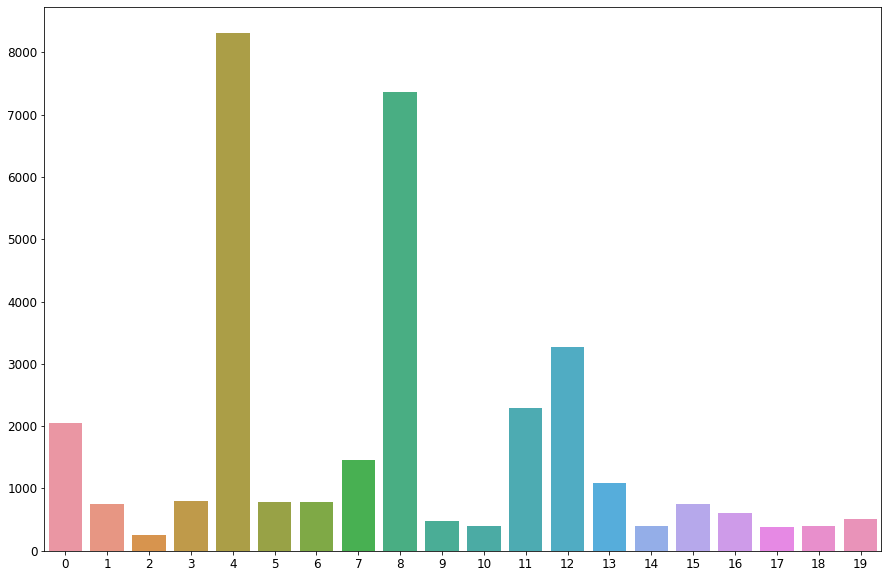

In [51]:
plt.figure(figsize=(15,10))
sns.barplot(x = list(cluster_dict.keys()),y = list(cluster_dict.values()))
plt.show()

In [102]:
cluster_df = df_.groupby('cluster_labels').mean()

In [47]:
cluster_df_ = (cluster_df - cluster_df.min())/(cluster_df.max()-cluster_df.min())

In [50]:
attributes = pd.read_csv('Attribute_details.csv',index_col='Name')

In [75]:
attributes['clusters_std'] = cluster_df_.std()
attributes['clusters_mean'] = cluster_df.mean()

In [76]:
attributes.sort_values('clusters_std',ascending=False)

,Unnamed: 0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,clusters_std,clusters_mean
Name,,,,,,,,,,
DP02_0124PE,123,ANCESTRY,Total population,Arab,NaN,NaN,NaN,NaN,0.304499,0.572464
DP02_0117PE,116,LANGUAGE SPOKEN AT HOME,Population 5 years and over,Other Indo-European languages,"Speak English less than ""very well""",NaN,NaN,NaN,0.293037,0.982994
DP05_0061PE,644,RACE,Total population,Two or more races,White and Asian,NaN,NaN,NaN,0.288697,0.682833
DP02_0064PE,63,EDUCATIONAL ATTAINMENT,Population 25 years and over,Bachelor's degree,NaN,NaN,NaN,NaN,0.284316,20.953220
DP03_0060PE,363,INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTE...,Total households,"$150,000 to $199,999",NaN,NaN,NaN,NaN,0.282538,7.218512
...,...,...,...,...,...,...,...,...,...,...
DP05_0042PE,625,RACE,Total population,One race,American Indian and Alaska Native,Navajo tribal grouping,NaN,NaN,0.144920,0.118226
DP05_0053PE,636,RACE,Total population,One race,Native Hawaiian and Other Pacific Islander,Native Hawaiian,NaN,NaN,0.144342,0.052027
DP02_0143PE,142,ANCESTRY,Total population,Slovak,NaN,NaN,NaN,NaN,0.143418,0.278666


In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [61]:
zipcode_loc = pd.read_csv('us-zip-code-latitude-and-longitude.csv',delimiter=';',index_col='Zip')
lat_dict = zipcode_loc['Latitude'].to_dict()
long_dict = zipcode_loc['Longitude'].to_dict()

In [71]:
df

,DP02_0001PE,DP02_0002PE,DP02_0003PE,DP02_0004PE,DP02_0005PE,DP02_0006PE,DP02_0007PE,DP02_0008PE,DP02_0009PE,DP02_0010PE,...,DP05_0065PE,DP05_0066PE,DP05_0067PE,DP05_0068PE,DP05_0069PE,DP05_0071PE,DP05_0087PE,DP05_0088PE,DP05_0089PE,cluster_labels
zip code tabulation area,,,,,,,,,,,,,,,,,,,,,
43964,3811.0,62.5,23.4,47.1,15.4,6.1,2.1,9.3,5.9,37.5,...,4.2,0.3,0.3,0.1,0.0,0.3,6811.0,48.4,51.6,21
28216,19911.0,60.3,29.1,33.9,13.8,5.6,3.1,20.8,12.1,39.7,...,66.4,1.1,2.3,0.0,4.6,8.0,36519.0,44.3,55.7,33
28277,26695.0,73.1,38.9,62.0,32.6,2.2,1.1,8.9,5.3,26.9,...,10.3,0.6,16.2,0.0,1.7,7.2,46233.0,46.2,53.8,40
28278,9176.0,76.1,37.8,60.4,30.0,5.3,3.1,10.4,4.6,23.9,...,37.0,0.9,6.9,0.7,2.3,10.5,18464.0,46.3,53.7,16
28303,13207.0,51.9,20.7,34.2,11.6,3.2,1.5,14.5,7.6,48.1,...,42.3,2.5,5.4,0.8,1.5,10.5,22326.0,48.0,52.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98279,340.0,55.9,11.8,51.2,8.2,4.1,3.5,0.6,0.0,44.1,...,0.5,0.6,1.8,0.0,1.6,3.2,567.0,54.3,45.7,2
98280,238.0,52.1,8.8,52.1,8.8,0.0,0.0,0.0,0.0,47.9,...,0.0,0.0,5.5,0.0,0.0,2.9,357.0,46.8,53.2,2
98311,10146.0,71.8,29.2,54.7,20.3,5.6,2.9,11.4,5.9,28.2,...,5.1,3.1,13.9,2.8,3.9,9.7,20729.0,51.5,48.5,39


In [109]:
df['latitude'] = df.index.map(lat_dict)
df['longitude'] = df.index.map(long_dict)
loc_df = df.groupby('cluster_labels')[['latitude','longitude']].std()

In [110]:
loc_df['location_variance'] = loc_df['latitude']**2 + loc_df['longitude']**2
loc_df.sort_values('location_variance',inplace=True)

In [89]:
loc_df

,latitude,longitude,location_variance
cluster_labels,,,
31,3.139215,10.887952,128.402167
20,4.671360,10.652639,135.300320
12,3.261272,11.329742,138.998950
3,2.390981,11.837457,145.842175
5,4.624927,11.177340,146.322872
29,4.741233,11.247368,148.982574
32,4.042240,11.543767,149.598258
25,4.155888,11.581273,151.397274
15,4.926678,12.060082,169.717726


In [112]:
l=36 #cluster number
fig = go.Figure(go.Scattergeo(lat=df[df['cluster_labels']==l]['latitude'],lon=df[df['cluster_labels']==l]['longitude']))
fig.update_geos(
    visible=False, resolution=50, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [113]:
l = 7
fig = go.Figure(go.Scattergeo(lat=df[df['cluster_labels']==l]['latitude'],lon=df[df['cluster_labels']==l]['longitude']))
fig.update_geos(
    visible=False, resolution=50, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [92]:
l = 20
fig = go.Figure(go.Scattergeo(lat=df[df['cluster_labels']==l]['latitude'],lon=df[df['cluster_labels']==l]['longitude']))
fig.update_geos(
    visible=False, resolution=50, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [115]:
l = 44
fig = go.Figure(go.Scattergeo(lat=df[df['cluster_labels']==l]['latitude'],lon=df[df['cluster_labels']==l]['longitude']))
fig.update_geos(
    visible=False, resolution=50, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [116]:
bachelors = cluster_df['DP02_0064PE']
high_income = cluster_df['DP03_0060PE']

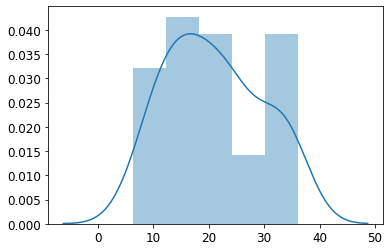

In [117]:
sns.distplot(list(bachelors))

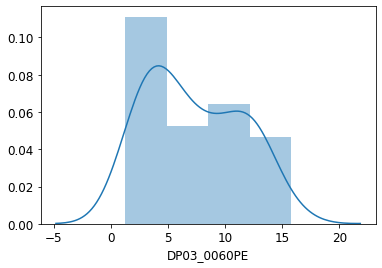

In [118]:
sns.distplot(high_income)

In [107]:
bachelors[bachelors>30]

cluster_labels
3     32.991667
7     34.189610
8     31.330464
12    31.182900
13    36.169784
19    33.305455
28    33.651875
35    35.717172
37    34.803106
40    30.232719
44    31.394524
Name: DP02_0064PE, dtype: float64

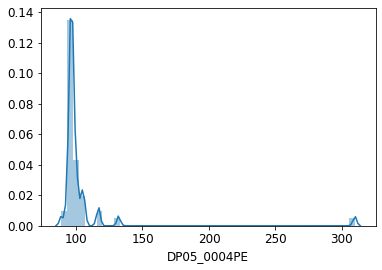

In [119]:
sex_ratio = cluster_df['DP05_0004PE']
sns.distplot(sex_ratio)